In [62]:
import pandas as pd
import matplotlib.pyplot as plt

In [291]:
d = {'C': [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150], # (mbps)
     'dc/dt_Max': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1], # (mbps/sec)
     'delta': [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6]}
df = pd.DataFrame(data=d)

R = 0.000095367431640625000000000000 #100 bytes actual pkg size

df['R'] = R
df.head()

,C,dc/dt_Max,delta,R
0,10,1,0.2,0.000095
1,20,1,0.3,0.000095
2,30,1,0.4,0.000095
3,40,1,0.5,0.000095
4,50,1,0.6,0.000095


In [294]:
df['R/C'] = df['R'] / df['C']
df['R/pC'] = df['R'] / (df['C'] + (df['dc/dt_Max'] * df['R/C']))

In [295]:
df['Rmax'] = abs(df['R/C'] - df['R/pC'])

In [296]:
df['T-delta'] = 1 / df['C'] - df['delta']

In [297]:
df.head()

,C,dc/dt_Max,delta,R,R/C,R/pC,Rmax,T-delta
0,10,1,0.2,0.000095,0.000010,0.000010,9.094938e-12,-0.100000
1,20,1,0.3,0.000095,0.000005,0.000005,1.136868e-12,-0.250000
2,30,1,0.4,0.000095,0.000003,0.000003,3.368499e-13,-0.366667
3,40,1,0.5,0.000095,0.000002,0.000002,1.421085e-13,-0.475000
4,50,1,0.6,0.000095,0.000002,0.000002,7.275957e-14,-0.580000


<AxesSubplot:xlabel='C'>

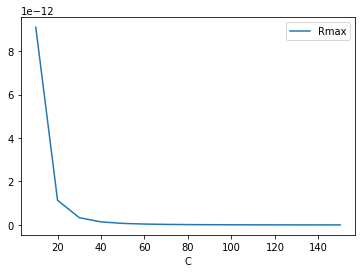

In [300]:
df.plot(x = 'C' , y = 'Rmax')


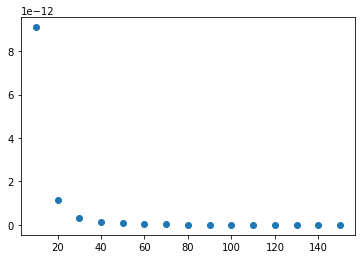

In [301]:
plt.scatter(df['C'], df['Rmax'])